In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

In [30]:
df1 = pd.read_csv('data/power_act_.csv')  


 'power_act_.csv'

 In total we have 18 columns and 64328 rows 

 Coulmns names : 
 ['dt_start_utc', 'power_act_21', 'power_act_24', 'power_act_47' .....]


 date ranges from '2019-06-30' to  '2021-04-30'

 Date seems to be recorded for every 15 minutes

All the columns contains missing values only for 'power_act_21' its 1.5% whereas >20% for other features

In [108]:
df1.tail(10)

,dt_start_utc,power_act_21,power_act_24,power_act_47,power_act_84,power_act_176,power_act_179,power_act_183,power_act_196,power_act_202,power_act_206,power_act_222,power_act_233,power_act_291,power_act_292,power_act_293,power_act_308,power_act_336
64318,2021-04-30 21:30:00+00:00,282.80,NaN,NaN,NaN,NaN,7.67,122.00,NaN,9.07,NaN,NaN,NaN,4.73,NaN,50.00,298.40,0.00
64319,2021-04-30 21:45:00+00:00,262.80,NaN,NaN,NaN,NaN,4.80,255.27,NaN,6.20,NaN,NaN,NaN,4.87,NaN,66.80,187.13,0.00
64320,2021-04-30 22:00:00+00:00,326.73,NaN,NaN,NaN,NaN,2.17,509.80,NaN,1.27,NaN,NaN,NaN,4.87,NaN,91.67,124.13,0.00
64321,2021-04-30 22:15:00+00:00,427.60,NaN,NaN,NaN,NaN,0.71,587.53,NaN,0.00,NaN,NaN,NaN,4.87,NaN,111.80,128.47,0.00
64322,2021-04-30 22:30:00+00:00,376.93,NaN,NaN,NaN,NaN,0.87,622.27,NaN,0.00,NaN,NaN,NaN,5.00,NaN,128.40,150.00,1.47
64323,2021-04-30 22:45:00+00:00,379.20,NaN,NaN,NaN,NaN,35.40,725.40,NaN,2.27,NaN,NaN,NaN,5.00,NaN,179.73,185.13,0.00
64324,2021-04-30 23:00:00+00:00,361.07,NaN,NaN,NaN,NaN,3.75,789.93,NaN,0.00,NaN,NaN,NaN,5.00,NaN,65.33,216.67,0.73
64325,2021-04-30 23:15:00+00:00,322.53,NaN,NaN,NaN,NaN,NaN,730.33,NaN,0.00,NaN,NaN,NaN,5.00,NaN,99.67,183.33,0.00
64326,2021-04-30 23:30:00+00:00,265.47,NaN,NaN,NaN,NaN,0.00,392.67,NaN,0.00,NaN,NaN,NaN,5.00,NaN,136.80,139.80,0.00
64327,2021-04-30 23:45:00+00:00,218.53,NaN,NaN,NaN,NaN,0.00,443.47,NaN,0.00,NaN,NaN,NaN,5.00,NaN,80.20,106.67,0.00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64328 entries, 0 to 64327
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dt_start_utc   64328 non-null  object 
 1   power_act_21   63323 non-null  float64
 2   power_act_24   35870 non-null  float64
 3   power_act_47   51966 non-null  float64
 4   power_act_84   35820 non-null  float64
 5   power_act_176  21472 non-null  float64
 6   power_act_179  11574 non-null  float64
 7   power_act_183  11634 non-null  float64
 8   power_act_196  36264 non-null  float64
 9   power_act_202  32659 non-null  float64
 10  power_act_206  36155 non-null  float64
 11  power_act_222  20587 non-null  float64
 12  power_act_233  35804 non-null  float64
 13  power_act_291  6976 non-null   float64
 14  power_act_292  6324 non-null   float64
 15  power_act_293  11608 non-null  float64
 16  power_act_308  11604 non-null  float64
 17  power_act_336  11434 non-null  float64
dtypes: flo

In [8]:
df1.describe()

,power_act_21,power_act_24,power_act_47,power_act_84,power_act_176,power_act_179,power_act_183,power_act_196,power_act_202,power_act_206,power_act_222,power_act_233,power_act_291,power_act_292,power_act_293,power_act_308,power_act_336
count,63323.000000,35870.000000,51966.000000,35820.000000,21472.000000,11574.000000,11634.000000,36264.000000,32659.000000,36155.000000,20587.000000,35804.000000,6976.000000,6324.000000,11608.000000,11604.000000,11434.000000
mean,1212.581952,2633.204800,513.223323,14934.553611,6549.359061,3986.642997,3233.878623,509.361062,1762.368488,1615.379901,6001.634630,1299.902677,1445.930337,4767.072878,1002.386530,916.566418,160.563395
std,1078.783668,3485.566243,814.631571,14791.761648,6527.278621,3718.453550,3770.938606,710.175027,1985.948602,2236.615782,6558.966661,1891.925262,1971.438063,3707.696806,1138.468036,902.617968,243.107968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.730000,0.000000,0.000000,1033.465000,1268.585000,958.250000,681.430000,0.000000,309.730000,54.300000,146.665000,0.000000,6.070000,2112.215000,112.800000,206.220000,4.530000
50%,923.530000,1176.165000,44.700000,10149.335000,4542.300000,2799.300000,1857.400000,180.130000,1081.400000,795.730000,3472.470000,508.230000,704.935000,3587.565000,583.235000,539.300000,77.200000
75%,1844.535000,4166.652500,765.835000,26145.647500,9962.817500,6106.217500,4305.302500,792.085000,2460.070000,2066.100000,10182.165000,1896.847500,2045.550000,6288.932500,1465.120000,1503.470000,190.052500
max,4712.000000,19835.400000,6164.330000,47167.070000,28411.730000,13883.530000,18413.800000,3215.130000,10327.730000,10668.470000,21594.130000,16684.930000,10284.130000,20170.070000,4800.000000,3456.730000,1577.270000


In [11]:
df1.isnull().sum().sort_values(ascending=False)/len(df1)*100

power_act_292    90.169133
power_act_291    89.155578
power_act_336    82.225469
power_act_179    82.007835
power_act_308    81.961199
power_act_293    81.954981
power_act_183    81.914563
power_act_222    67.996829
power_act_176    66.621067
power_act_202    49.230506
power_act_233    44.341500
power_act_84     44.316627
power_act_24     44.238901
power_act_206    43.795859
power_act_196    43.626415
power_act_47     19.217137
power_act_21      1.562306
dt_start_utc      0.000000
dtype: float64

In [20]:
df1['dt_start_utc'] = df1['dt_start_utc'].apply(pd.to_datetime)

In [24]:
df1 = df1.set_index('dt_start_utc')

<AxesSubplot:>

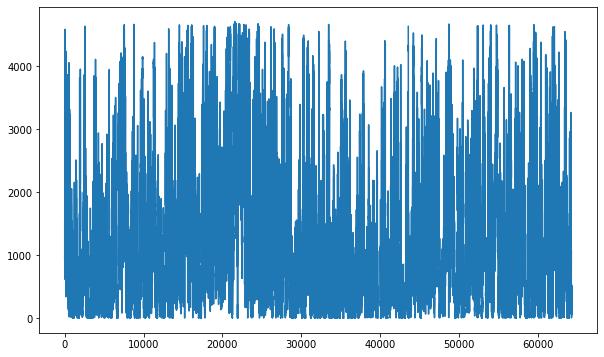

In [117]:
plt.figure(figsize=(10,6))
df1['power_act_21'].plot()


<AxesSubplot:xlabel='dt_start_utc'>

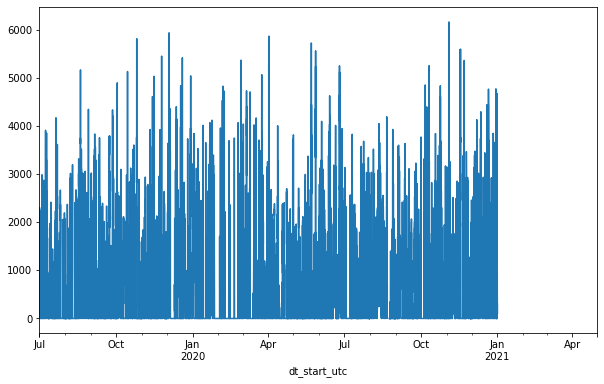

In [28]:
plt.figure(figsize=(10,6))
df1['power_act_47'].plot()

<AxesSubplot:xlabel='dt_start_utc'>

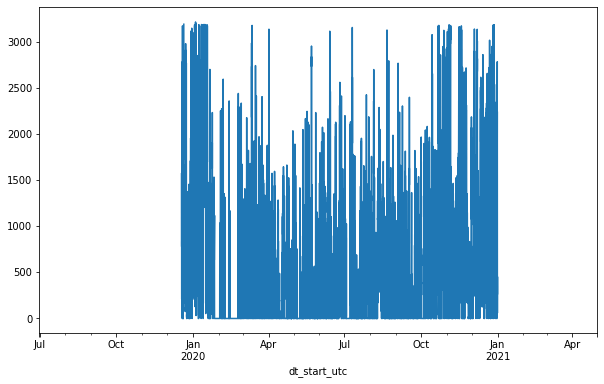

In [29]:
plt.figure(figsize=(10,6))
df1['power_act_196'].plot()

In [109]:
df2 = pd.read_csv('data/power_fc_.csv')  

'power_fc_.csv'

 In total we have 23 columns and 66020 rows 

 Coulmns names : 
 ['dt_start_utc', 'power_act_21', 'power_act_24', 'power_act_47' .....]


 date ranges from ''2019-06-13 07:00'' to  ''2021-04-30 23:45''

 Date seems to be recorded for every 15 minutes

no null values for 'power_act_21'  whereas for other features >17% null values

In [114]:
df2['dt_start_utc'].max()

'2021-04-30 23:45:00+00:00'

In [31]:
df2.head()

,dt_start_utc,power_fc_21,power_fc_24,power_fc_47,power_fc_48,power_fc_51,power_fc_176,power_fc_179,power_fc_183,power_fc_196,...,power_fc_233,power_fc_291,power_fc_292,power_fc_293,power_fc_308,power_fc_322,power_fc_325,power_fc_327,power_fc_336,power_fc_339
0,2019-06-13 07:00:00+00:00,79.0,NaN,700.0,2990.0,3754.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-13 07:15:00+00:00,82.0,NaN,793.0,3148.0,3910.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-13 07:30:00+00:00,70.0,NaN,510.0,4792.0,3953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-13 07:45:00+00:00,69.0,NaN,278.0,7205.0,5177.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-13 08:00:00+00:00,111.0,NaN,1609.0,4408.0,5388.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df2.shape

(66020, 23)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66020 entries, 0 to 66019
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_start_utc  66020 non-null  object 
 1   power_fc_21   66020 non-null  float64
 2   power_fc_24   36708 non-null  float64
 3   power_fc_47   54789 non-null  float64
 4   power_fc_48   18400 non-null  float64
 5   power_fc_51   18400 non-null  float64
 6   power_fc_176  21934 non-null  float64
 7   power_fc_179  11639 non-null  float64
 8   power_fc_183  11639 non-null  float64
 9   power_fc_196  36708 non-null  float64
 10  power_fc_202  33261 non-null  float64
 11  power_fc_206  36612 non-null  float64
 12  power_fc_222  21934 non-null  float64
 13  power_fc_233  36708 non-null  float64
 14  power_fc_291  11624 non-null  float64
 15  power_fc_292  11624 non-null  float64
 16  power_fc_293  11624 non-null  float64
 17  power_fc_308  11624 non-null  float64
 18  power_fc_322  11624 non-nu

In [34]:
df2.isnull().sum().sort_values(ascending=False)/len(df1)*100

power_fc_339    84.560378
power_fc_293    84.560378
power_fc_336    84.560378
power_fc_327    84.560378
power_fc_325    84.560378
power_fc_322    84.560378
power_fc_308    84.560378
power_fc_291    84.560378
power_fc_292    84.560378
power_fc_179    84.537060
power_fc_183    84.537060
power_fc_48     74.026862
power_fc_51     74.026862
power_fc_176    68.533143
power_fc_222    68.533143
power_fc_202    50.924947
power_fc_206    45.715707
power_fc_233    45.566472
power_fc_196    45.566472
power_fc_24     45.566472
power_fc_47     17.458960
power_fc_21      0.000000
dt_start_utc     0.000000
dtype: float64

In [56]:
df2['dt_start_utc'] = df2['dt_start_utc'].apply(pd.to_datetime)
#df2 = df2.reset_index('dt_start_utc')

In [42]:
df2['dt_start_utc'] = df2['dt_start_utc'].apply(pd.to_datetime)

In [57]:
df2.head()

,dt_start_utc,power_fc_21,power_fc_24,power_fc_47,power_fc_48,power_fc_51,power_fc_176,power_fc_179,power_fc_183,power_fc_196,...,power_fc_233,power_fc_291,power_fc_292,power_fc_293,power_fc_308,power_fc_322,power_fc_325,power_fc_327,power_fc_336,power_fc_339
0,2019-06-13 07:00:00+00:00,79.0,NaN,700.0,2990.0,3754.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-13 07:15:00+00:00,82.0,NaN,793.0,3148.0,3910.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-13 07:30:00+00:00,70.0,NaN,510.0,4792.0,3953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-13 07:45:00+00:00,69.0,NaN,278.0,7205.0,5177.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-13 08:00:00+00:00,111.0,NaN,1609.0,4408.0,5388.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df3 = pd.read_csv('data/regelleistung_aggr_results.csv')


 'regelleistung_aggr_results.csv'

 In total we have 17 columns and 16068 rows 

 Coulmns names : 
 ['date_start', 'date_end', 'product', 'reserve_type', 'total_min_capacity_price_eur_mw',#   
 'total_average_capacity_price_eur_mw', 'total_marginal_capacity_price_eur_mw','total_min_energy_price_eur_mwh', 'total_average_energy_price_eur_mwh', 'total_marginal_energy_price_eur_mwh', 'germany_min_capacity_price_eur_mw',
 'germany_average_capacity_price_eur_mw', 'germany_marginal_capacity_price_eur_mw','germany_min_energy_price_eur_mwh',
 'germany_average_energy_price_eur_mwh', 'germany_marginal_energy_price_eur_mwh', 'germany_import_export_mw']

 2 unique reserve type ['MRL', 'SRL']

 12 unique product type ['NEG_00_04', 'NEG_04_08', 'NEG_08_12', 'NEG_12_16', 'NEG_16_20','NEG_20_24', 'POS_00_04', 'POS_04_08', 'POS_08_12', 'POS_12_16', 'POS_16_20', 'POS_20_24']

 date ranges from '2019-01-01' to  '2021-03-19'

 Date seems to be recorded for every hours (24 values for each days)

 Few columns contains missing values of about 37%

In [83]:
df3.shape

(16068, 17)

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16068 entries, 0 to 16067
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date_start                              16068 non-null  object 
 1   date_end                                16068 non-null  object 
 2   product                                 16068 non-null  object 
 3   reserve_type                            16068 non-null  object 
 4   total_min_capacity_price_eur_mw         16068 non-null  float64
 5   total_average_capacity_price_eur_mw     16068 non-null  float64
 6   total_marginal_capacity_price_eur_mw    16068 non-null  float64
 7   total_min_energy_price_eur_mwh          15828 non-null  float64
 8   total_average_energy_price_eur_mwh      15828 non-null  float64
 9   total_marginal_energy_price_eur_mwh     15828 non-null  float64
 10  germany_min_capacity_price_eur_mw       16068 non-null  fl

In [101]:
df3.groupby(by='date_start').count().head(2)

,date_end,product,reserve_type,total_min_capacity_price_eur_mw,total_average_capacity_price_eur_mw,total_marginal_capacity_price_eur_mw,total_min_energy_price_eur_mwh,total_average_energy_price_eur_mwh,total_marginal_energy_price_eur_mwh,germany_min_capacity_price_eur_mw,germany_average_capacity_price_eur_mw,germany_marginal_capacity_price_eur_mw,germany_min_energy_price_eur_mwh,germany_average_energy_price_eur_mwh,germany_marginal_energy_price_eur_mwh,germany_import_export_mw
date_start,,,,,,,,,,,,,,,,
2019-01-01,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2019-01-02,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


In [73]:
df3['reserve_type'].unique()

array(['MRL', 'SRL'], dtype=object)

In [75]:
df3['product'].unique()

array(['NEG_00_04', 'NEG_04_08', 'NEG_08_12', 'NEG_12_16', 'NEG_16_20',
       'NEG_20_24', 'POS_00_04', 'POS_04_08', 'POS_08_12', 'POS_12_16',
       'POS_16_20', 'POS_20_24'], dtype=object)

In [100]:
#sns.pairplot(df3)

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16068 entries, 0 to 16067
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date_start                              16068 non-null  object 
 1   date_end                                16068 non-null  object 
 2   product                                 16068 non-null  object 
 3   reserve_type                            16068 non-null  object 
 4   total_min_capacity_price_eur_mw         16068 non-null  float64
 5   total_average_capacity_price_eur_mw     16068 non-null  float64
 6   total_marginal_capacity_price_eur_mw    16068 non-null  float64
 7   total_min_energy_price_eur_mwh          15828 non-null  float64
 8   total_average_energy_price_eur_mwh      15828 non-null  float64
 9   total_marginal_energy_price_eur_mwh     15828 non-null  float64
 10  germany_min_capacity_price_eur_mw       16068 non-null  fl

In [49]:
df3.isnull().sum().sort_values(ascending=False)/len(df1)*100

total_average_energy_price_eur_mwh        0.373088
total_marginal_energy_price_eur_mwh       0.373088
germany_marginal_energy_price_eur_mwh     0.373088
germany_average_energy_price_eur_mwh      0.373088
germany_min_energy_price_eur_mwh          0.373088
total_min_energy_price_eur_mwh            0.373088
germany_marginal_capacity_price_eur_mw    0.000000
germany_average_capacity_price_eur_mw     0.000000
germany_min_capacity_price_eur_mw         0.000000
date_start                                0.000000
date_end                                  0.000000
total_marginal_capacity_price_eur_mw      0.000000
total_average_capacity_price_eur_mw       0.000000
total_min_capacity_price_eur_mw           0.000000
reserve_type                              0.000000
product                                   0.000000
germany_import_export_mw                  0.000000
dtype: float64

In [63]:
df3.shape

(16068, 17)

In [ ]:
df4 = pd.read_csv('data/regelleistung_demand.csv')

In [52]:
df4.head()

,date_start,date_end,product,total_demand_mw,germany_block_demand_mw,reserve_type
0,2019-01-01,2019-01-01,NEG_00_04,1067,1067,MRL
1,2019-01-01,2019-01-01,NEG_00_04,1760,1760,SRL
2,2019-01-01,2019-01-01,NEG_04_08,1067,1067,MRL
3,2019-01-01,2019-01-01,NEG_04_08,1760,1760,SRL
4,2019-01-01,2019-01-01,NEG_08_12,1067,1067,MRL


 'regelleistung_demand.csv'

 In total we have 6 columns and 16188 rows 

 Coulmns names : ['date_start', 'date_end', 'product', 'total_demand_mw',
       'germany_block_demand_mw', 'reserve_type']

 2 unique reserve type ['MRL', 'SRL']

 12 unique product type ['NEG_00_04', 'NEG_04_08', 'NEG_08_12', 'NEG_12_16', 'NEG_16_20','NEG_20_24', 'POS_00_04', 'POS_04_08', 'POS_08_12', 'POS_12_16', 'POS_16_20', 'POS_20_24']

 date ranges from '2019-01-01' to  '2021-03-18'

 Date seems to be recorded for every hours (24 values for each days)

no missing values 

In [98]:
df4.isnull().sum().sort_values(ascending=False)

date_start                 0
date_end                   0
product                    0
total_demand_mw            0
germany_block_demand_mw    0
reserve_type               0
dtype: int64

In [91]:
def check_unique(df):
    ''' check unique values for each columns and 
    print them if they are below 15'''

    for col in df.columns:
        n = df[col].nunique()
        print(f'{col} has {n} unique values')
        if n < 15:
            print(df[col].unique())

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date_start               16188 non-null  object
 1   date_end                 16188 non-null  object
 2   product                  16188 non-null  object
 3   total_demand_mw          16188 non-null  int64 
 4   germany_block_demand_mw  16188 non-null  int64 
 5   reserve_type             16188 non-null  object
dtypes: int64(2), object(4)
memory usage: 758.9+ KB


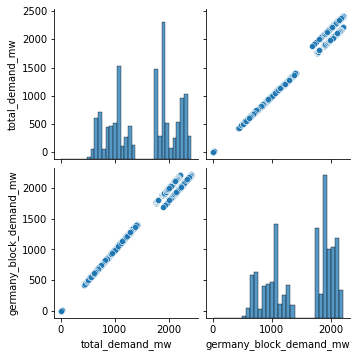

In [54]:
sns.pairplot(df4)